In [1]:
#Prepare Notebook

from google.colab import drive
drive.mount('/content/drive')

!pip install torch==1.8.0+cpu torchvision==0.9.0+cpu torchaudio===0.8.0 -f https://download.pytorch.org/whl/torch_stable.html

!pip install transformers==3.1.0

!pip install ktrain

Mounted at /content/drive
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 169.1 MB 47 kB/s 
     |████████████████████████████████| 13.3 MB 70 kB/s 
     |████████████████████████████████| 1.9 MB 9.0 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.8.0+cpu which is incompatible.
     |████████████████████████████████| 884 kB 8.2 MB/s 
     |████████████████████████████████| 1.2 MB 24.

In [7]:
db_df = pd.read_pickle('/content/drive/MyDrive/db_df.pkl')



In [2]:
# Import Libraries

import ktrain
import pandas as pd
import numpy as np
import pickle
import spacy

from ktrain import text
from collections import Counter

In [ ]:
# Use this dataframe for now

df = pd.read_pickle('/content/drive/MyDrive/preprodf_Augm.pkl')

In [ ]:
nlp = spacy.load("en")

def word_counter(key, string):
    counts = []
    count = 0
    my_string = nlp(string)
    for token in my_string:
        # actual word
        word = token.text
        # lemma
        lemma_word = token.lemma_
        # part of speech
        word_pos = token.pos_
        if lemma_word in key:
            count += 1
    return count


In [ ]:
key_words = ['sleep', 'randomized control trial', 'insomnia', 'depression', 'anxiety', 'herb', 'mind-body', 'acupuncture', 
             'music', 'mindfulness', 'meditation', 'tai ji', 'tai chi', 'qigong', 'yoga', 'hypnotherapy', 'massage', 
             'manipulation' , 'traditional chinese medicine', 'homeopathy', 'relaxation', 'guided imagery', 
             'systematic review', 'secondary', 'meta-analysis', 'infants','adolescent', 'children', 'protocol']

In [ ]:
ky_count = []

for i in range(len(key_words)):
  temp = df['AbstractPlusTitle'].apply(lambda x: word_counter(key_words[i], x))
  ky_count.append(temp)

In [ ]:
np.shape(ky_count)

(29, 547)

In [ ]:
#Prepare target variable
target = df['AbL']
target = np.array(target)
target = np.transpose(target)

In [ ]:
ky_count.append(target)
np.shape(ky_count)

(30, 547)

In [ ]:
ky_count = np.transpose(ky_count)
ky_count.shape

(547, 30)

In [ ]:
key_words.append('AbL')

In [ ]:
ky_df = pd.DataFrame(ky_count, columns = key_words)

In [ ]:
ky_df.head()

,sleep,randomized control trial,insomnia,depression,anxiety,herb,mind-body,acupuncture,music,mindfulness,meditation,tai ji,tai chi,qigong,yoga,hypnotherapy,massage,manipulation,traditional chinese medicine,homeopathy,relaxation,guided imagery,systematic review,secondary,meta-analysis,infants,adolescent,children,protocol,AbL
0,1,2,0,0,1,0,2,0,0,1,0,5,10,5,0,0,0,0,5,0,0,0,3,0,4,0,0,5,0,0
1,7,16,8,21,8,0,10,13,0,15,8,2,4,12,1,13,1,13,16,5,8,1,3,8,16,8,14,10,5,0
2,1,5,0,1,0,0,1,0,0,0,0,8,16,0,0,3,1,0,8,0,0,0,5,0,4,0,0,8,0,0
3,2,7,0,2,0,0,0,0,0,0,0,7,14,0,0,0,0,0,14,0,0,0,2,0,6,0,0,7,0,0
4,2,15,0,4,2,1,0,1,0,0,1,3,6,0,0,2,0,1,8,0,2,1,10,1,4,0,0,4,4,0


In [ ]:
ky_df.describe()

,sleep,randomized control trial,insomnia,depression,anxiety,herb,mind-body,acupuncture,music,mindfulness,meditation,tai ji,tai chi,qigong,yoga,hypnotherapy,massage,manipulation,traditional chinese medicine,homeopathy,relaxation,guided imagery,systematic review,secondary,meta-analysis,infants,adolescent,children,protocol,AbL
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.00000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.00000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,5.550274,7.848263,1.914077,5.294333,2.727605,0.548446,1.831810,4.153565,0.934186,2.749543,1.603291,0.59415,1.078611,1.009141,1.221207,4.060329,1.420475,2.784278,3.681901,2.52468,1.493601,1.292505,2.056673,2.071298,2.460695,1.303473,2.153565,1.819013,2.559415,0.429616
std,5.253181,4.887827,2.737931,4.716042,2.842126,1.565111,2.829892,4.784954,2.430586,3.447324,2.697480,1.97878,3.297135,1.925800,3.255380,4.608681,2.327291,3.589399,4.449277,3.38452,2.325495,2.342942,2.927463,2.518146,2.909472,2.333709,3.101784,2.753979,3.415870,0.495474
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,7.000000,1.000000,4.000000,2.000000,0.000000,1.000000,3.000000,0.000000,2.000000,1.000000,0.00000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,2.000000,1.00000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,8.000000,10.000000,3.000000,7.000000,4.000000,0.000000,2.000000,6.000000,1.000000,4.000000,2.000000,0.00000,0.000000,2.000000,0.000000,6.000000,2.000000,4.000000,5.000000,4.00000,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,3.000000,3.000000,4.000000,1.000000
max,33.000000,33.000000,16.000000,31.000000,19.000000,10.000000,21.000000,26.000000,24.000000,24.000000,22.000000,15.00000,30.000000,15.000000,39.000000,28.000000,15.000000,26.000000,24.000000,25.00000,15.000000,21.000000,17.000000,17.000000,16.000000,15.000000,20.000000,15.000000,24.000000,1.000000


In [ ]:
ky_df.to_pickle('/content/drive/MyDrive/Ky_df.pkl')

**Build a Random Forest Model using Key Words**

In [3]:
ky_df = pd.read_pickle('/content/drive/MyDrive/Ky_df.pkl')

In [4]:
import scipy
import sklearn

In [5]:
predictor = ktrain.load_predictor('/content/drive/MyDrive/distbert_pred')

In [6]:
df = pd.read_pickle('/content/drive/MyDrive/preprodf_Augm.pkl')

In [7]:
text = list(df['AbstractPlusTitle'])
db_pred = predictor.predict(text, return_proba=True)

In [8]:
ky_df.insert(loc=29, column='Predictions', value=db_pred[:,1])

In [9]:
ky_df

,sleep,randomized control trial,insomnia,depression,anxiety,herb,mind-body,acupuncture,music,mindfulness,meditation,tai ji,tai chi,qigong,yoga,hypnotherapy,massage,manipulation,traditional chinese medicine,homeopathy,relaxation,guided imagery,systematic review,secondary,meta-analysis,infants,adolescent,children,protocol,Predictions,AbL
0,1,2,0,0,1,0,2,0,0,1,0,5,10,5,0,0,0,0,5,0,0,0,3,0,4,0,0,5,0,0.004903,0
1,7,16,8,21,8,0,10,13,0,15,8,2,4,12,1,13,1,13,16,5,8,1,3,8,16,8,14,10,5,0.005400,0
2,1,5,0,1,0,0,1,0,0,0,0,8,16,0,0,3,1,0,8,0,0,0,5,0,4,0,0,8,0,0.007127,0
3,2,7,0,2,0,0,0,0,0,0,0,7,14,0,0,0,0,0,14,0,0,0,2,0,6,0,0,7,0,0.004799,0
4,2,15,0,4,2,1,0,1,0,0,1,3,6,0,0,2,0,1,8,0,2,1,10,1,4,0,0,4,4,0.005088,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,6,5,1,6,2,2,2,6,0,2,1,0,0,1,0,11,1,4,3,3,3,2,2,3,1,1,1,3,5,0.946757,1
543,2,6,0,1,1,3,0,1,0,0,0,0,3,0,0,3,1,0,3,3,0,1,2,0,0,0,1,4,0,0.019634,0
544,1,8,0,2,1,0,1,4,2,1,1,0,2,0,0,0,0,0,5,0,0,1,4,4,0,0,3,3,4,0.005502,0
545,2,4,0,1,1,1,0,1,0,1,2,0,0,1,1,3,2,0,1,1,1,2,2,1,1,0,1,1,0,0.005187,0


In [10]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [11]:
# Split-out validation dataset
X = ky_df.values[:,0:30]
y = ky_df.values[:,30]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [12]:
# Make predictions on validation dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

model = RandomForestClassifier(random_state = 42)
model.fit(X_train, Y_train)
pred = model.predict_proba(X_test)[:,1] #model.predict(X_test)
roc_auc_score(Y_test, pred)

0.9579533941236069

In [13]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [14]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, scoring = 'roc_auc', param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [15]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 600}

In [16]:
pred = rf_random.predict_proba(X_test)[:,1] #model.predict(X_test)
roc_auc_score(Y_test, pred)

0.9591354272205336

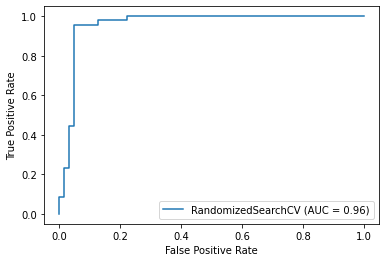

In [17]:
from sklearn import metrics
import matplotlib.pyplot as plt  

metrics.plot_roc_curve(rf_random, X_test, Y_test)
plt.show()  

In [18]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, pred)
op_threshold = thresholds[np.argmax(tpr - fpr)]
y_pred_bin = np.where(pred < op_threshold, 0, 1)

tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_bin).ravel()
(tn, fp, fn, tp)

(60, 3, 2, 45)

In [1]:
#op_threshold (not using)

In [33]:
# Set threshold and visually see confusion matrix and other mertrics not just AUC
from sklearn.metrics import confusion_matrix

# Set Threshold
thr = 0.1
y_pred_bin = np.where(pred < thr, 0, 1)

confusion_matrix(Y_test,y_pred_bin)

tn, fp, fn, tp = confusion_matrix(Y_test,y_pred_bin).ravel()
(tn, fp, fn, tp)

(33, 30, 0, 47)

In [34]:
# Set Threshold
thr = 0.2
y_pred_bin = np.where(pred < thr, 0, 1)

confusion_matrix(Y_test,y_pred_bin)

tn, fp, fn, tp = confusion_matrix(Y_test,y_pred_bin).ravel()
(tn, fp, fn, tp)

(49, 14, 1, 46)

In [35]:
# Set Threshold
thr = 0.3
y_pred_bin = np.where(pred < thr, 0, 1)

confusion_matrix(Y_test,y_pred_bin)

tn, fp, fn, tp = confusion_matrix(Y_test,y_pred_bin).ravel()
(tn, fp, fn, tp)

(54, 9, 1, 46)

In [36]:
# Set Threshold
thr = 0.4
y_pred_bin = np.where(pred < thr, 0, 1)

confusion_matrix(Y_test,y_pred_bin)

tn, fp, fn, tp = confusion_matrix(Y_test,y_pred_bin).ravel()
(tn, fp, fn, tp)

(57, 6, 2, 45)

In [37]:
# Set Threshold
thr = 0.5
y_pred_bin = np.where(pred < thr, 0, 1)

confusion_matrix(Y_test,y_pred_bin)

tn, fp, fn, tp = confusion_matrix(Y_test,y_pred_bin).ravel()
(tn, fp, fn, tp)

(58, 5, 2, 45)

In [43]:
# Set Threshold
thr = 0.57
y_pred_bin = np.where(pred < thr, 0, 1)

confusion_matrix(Y_test,y_pred_bin)

tn, fp, fn, tp = confusion_matrix(Y_test,y_pred_bin).ravel()
(tn, fp, fn, tp)

(60, 3, 3, 44)

In [39]:
# Set Threshold
thr = 0.6
y_pred_bin = np.where(pred < thr, 0, 1)

confusion_matrix(Y_test,y_pred_bin)

tn, fp, fn, tp = confusion_matrix(Y_test,y_pred_bin).ravel()
(tn, fp, fn, tp)

(60, 3, 4, 43)

In [40]:
# Set Threshold
thr = 0.7
y_pred_bin = np.where(pred < thr, 0, 1)

confusion_matrix(Y_test,y_pred_bin)

tn, fp, fn, tp = confusion_matrix(Y_test,y_pred_bin).ravel()
(tn, fp, fn, tp)

(60, 3, 12, 35)

In [41]:
# Set Threshold
thr = 0.8
y_pred_bin = np.where(pred < thr, 0, 1)

confusion_matrix(Y_test,y_pred_bin)

tn, fp, fn, tp = confusion_matrix(Y_test,y_pred_bin).ravel()
(tn, fp, fn, tp)

(60, 3, 24, 23)

In [55]:
# Set Threshold
thr = 0.9
y_pred_bin = np.where(pred < thr, 0, 1)

confusion_matrix(Y_test,y_pred_bin)

tn, fp, fn, tp = confusion_matrix(Y_test,y_pred_bin).ravel()
(tn, fp, fn, tp)

(62, 1, 42, 5)

In [19]:
# Set Threshold
thr = 0.45
y_pred_bin = np.where(pred < thr, 0, 1)

confusion_matrix(Y_test,y_pred_bin)

tn, fp, fn, tp = confusion_matrix(Y_test,y_pred_bin).ravel()
(tn, fp, fn, tp)

(57, 6, 2, 45)

In [26]:
# Set Threshold
thr = 0.56
y_pred_bin = np.where(pred < thr, 0, 1)

confusion_matrix(Y_test,y_pred_bin)

tn, fp, fn, tp = confusion_matrix(Y_test,y_pred_bin).ravel()
(tn, fp, fn, tp)

(60, 3, 2, 45)

In [23]:
# Set Threshold
thr = 0.35
y_pred_bin = np.where(pred < thr, 0, 1)

confusion_matrix(Y_test,y_pred_bin)

tn, fp, fn, tp = confusion_matrix(Y_test,y_pred_bin).ravel()
(tn, fp, fn, tp)

(57, 6, 2, 45)

In [21]:
#Print F-1 metrics
thr = 0.55
y_pred_bin = np.where(pred < thr, 0, 1)
metrics.classification_report(Y_test,y_pred_bin)

'              precision    recall  f1-score   support\n\n         0.0       0.97      0.94      0.95        63\n         1.0       0.92      0.96      0.94        47\n\n    accuracy                           0.95       110\n   macro avg       0.94      0.95      0.94       110\nweighted avg       0.95      0.95      0.95       110\n'

In [27]:
#Print F-1 metrics
thr = 0.56
y_pred_bin = np.where(pred < thr, 0, 1)
metrics.classification_report(Y_test,y_pred_bin)

'              precision    recall  f1-score   support\n\n         0.0       0.97      0.95      0.96        63\n         1.0       0.94      0.96      0.95        47\n\n    accuracy                           0.95       110\n   macro avg       0.95      0.95      0.95       110\nweighted avg       0.95      0.95      0.95       110\n'

In [ ]:
model.feature_importances_

array([0.03530987, 0.02501843, 0.01193452, 0.02731698, 0.03079855,
       0.00558396, 0.01445323, 0.02689776, 0.01030253, 0.01441273,
       0.01741526, 0.00337024, 0.00711287, 0.00748625, 0.00627076,
       0.02478414, 0.01328199, 0.03883137, 0.02126304, 0.03495807,
       0.01434257, 0.01165193, 0.03273896, 0.01813368, 0.02036131,
       0.00707351, 0.01529454, 0.00944896, 0.02424069, 0.46991131])

In [ ]:
filename = '/content/drive/MyDrive/db_plus_ky.sav'
pickle.dump(model, open(filename, 'wb'))

**Build a SVM Model**

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
pred = clf.predict(X_test)

#Calculte AUC
roc_auc_score(Y_test, pred)

0.9336372847011144

**KNN Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

klf = KNeighborsClassifier(n_neighbors=13)

# Train the model using the training sets
klf.fit(X_train, Y_train)

#Predict Output
pred = klf.predict(X_test)

#Calculte AUC
roc_auc_score(Y_test, pred)

0.7002701789935831

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, Y_train)

# make predictions for test data
pred = model.predict(X_test)

#Calculte AUC
roc_auc_score(Y_test, pred)

0.9311043566362717

In [ ]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(X_train, Y_train)

# make predictions for test data
pred = model.predict(X_test)

#Calculte AUC
roc_auc_score(Y_test, pred)

0.8620398514015535

In [ ]:
import pandas as pd

df = pd.read_pickle('/content/drive/MyDrive/HS651_CAMs_systematic_review_automation/Ky_df.pkl')
df

,sleep,randomized control trial,insomnia,depression,anxiety,herb,mind-body,acupuncture,music,mindfulness,meditation,tai ji,tai chi,qigong,yoga,hypnotherapy,massage,manipulation,traditional chinese medicine,homeopathy,relaxation,guided imagery,systematic review,secondary,meta-analysis,infants,adolescent,children,protocol,AbL
0,1,2,0,0,1,0,2,0,0,1,0,5,10,5,0,0,0,0,5,0,0,0,3,0,4,0,0,5,0,0
1,7,16,8,21,8,0,10,13,0,15,8,2,4,12,1,13,1,13,16,5,8,1,3,8,16,8,14,10,5,0
2,1,5,0,1,0,0,1,0,0,0,0,8,16,0,0,3,1,0,8,0,0,0,5,0,4,0,0,8,0,0
3,2,7,0,2,0,0,0,0,0,0,0,7,14,0,0,0,0,0,14,0,0,0,2,0,6,0,0,7,0,0
4,2,15,0,4,2,1,0,1,0,0,1,3,6,0,0,2,0,1,8,0,2,1,10,1,4,0,0,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,6,5,1,6,2,2,2,6,0,2,1,0,0,1,0,11,1,4,3,3,3,2,2,3,1,1,1,3,5,1
543,2,6,0,1,1,3,0,1,0,0,0,0,3,0,0,3,1,0,3,3,0,1,2,0,0,0,1,4,0,0
544,1,8,0,2,1,0,1,4,2,1,1,0,2,0,0,0,0,0,5,0,0,1,4,4,0,0,3,3,4,0
545,2,4,0,1,1,1,0,1,0,1,2,0,0,1,1,3,2,0,1,1,1,2,2,1,1,0,1,1,0,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
